In [1]:
#impoting the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

import warnings 
warnings.filterwarnings('ignore')

C:\Users\ASUS_AMZAD\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("C:/Users/ASUS_AMZAD/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<p>The dataset is clean and well format.There are no null values and the data types are consistent.</p>

<h2>1.Choose a classification dataset and normalize features.</h2>

In [6]:
#drop the id column

df.drop("Id", axis=1, inplace=True)

In [7]:
#seprate features and target

X = df.drop("Species", axis=1)
y = df["Species"]

In [8]:
X.shape

(150, 4)

In [9]:
#normalize the features

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [10]:
X_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

<h2>2.Use KNeighborsClassifier from sklearn.</h2>

In [11]:
#split the dataset into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X_norm, y , test_size=0.20, random_state=42, stratify=y)

<IPython.core.display.Javascript object>

In [12]:
#intialize the knn with k=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
#predict on test set

y_pred =knn.predict(X_test)

<h2>3.Experiment with different values of K.</h2>

In [14]:
#store accuracy for each k

k_values = list(range(1,21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"K = {k}, accuracy = {acc:.4f} ")

K = 1, accuracy = 0.9667 
K = 2, accuracy = 0.9333 
K = 3, accuracy = 0.9667 
K = 4, accuracy = 0.9333 
K = 5, accuracy = 0.9667 
K = 6, accuracy = 0.9667 
K = 7, accuracy = 1.0000 
K = 8, accuracy = 0.9667 
K = 9, accuracy = 0.9667 
K = 10, accuracy = 0.9667 
K = 11, accuracy = 0.9667 
K = 12, accuracy = 0.9667 
K = 13, accuracy = 0.9333 
K = 14, accuracy = 0.9333 
K = 15, accuracy = 0.9667 
K = 16, accuracy = 0.9667 
K = 17, accuracy = 0.9667 
K = 18, accuracy = 0.9667 
K = 19, accuracy = 0.9667 
K = 20, accuracy = 0.9333 


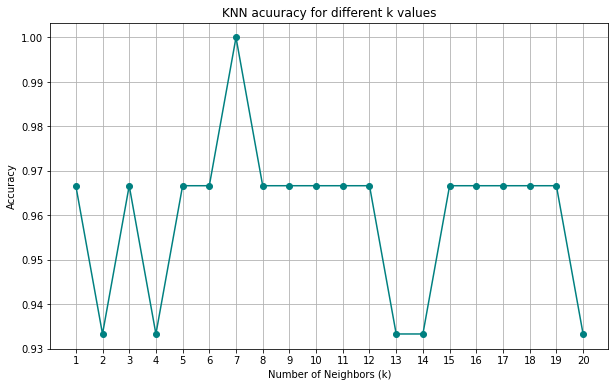

In [15]:
#plotting accuracies vs k vales

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN acuuracy for different k values")
plt.grid(True)
plt.show()

<h2>4.Evaluate model using accuracy, confusion matrix.</h2>

In [16]:
#accuracy 

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9667


In [17]:
#compute confusion matrix 

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


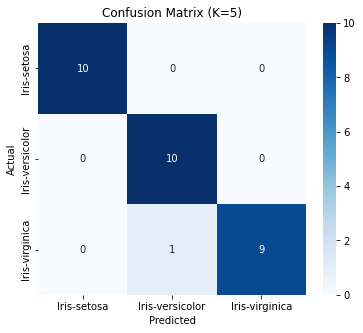

In [18]:
# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K=5)")
plt.show()

In [19]:
#Classification report

class_report = classification_report(y_test, y_pred)
print("Classification report: \n", class_report)

Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



 <h2>5.Visualize decision boundaries.</h2>

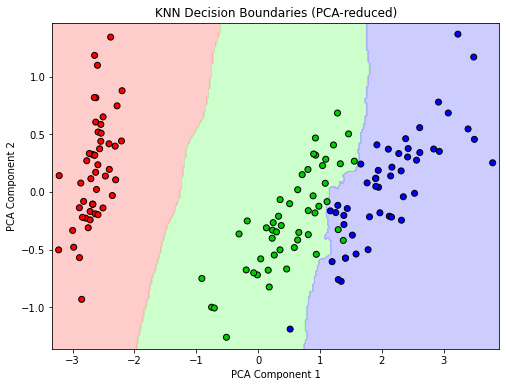

In [20]:
# Encode species labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Reduce to 2D for visualization
X_pca = PCA(n_components=2).fit_transform(X)

# Train KNN on PCA-reduced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y_encoded)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict over the grid (returns numeric labels now)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00CC00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap=cmap_bold, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundaries (PCA-reduced)")
plt.show()